# Aula 15

Hoje vamos falar mais um pouco sobre outro método para estimar o erro da integração

## Resumo do que foi feito até agora

In [1]:
# Primeiramente definimos os valores das constantes que serão utilizadas no problema
import numpy as np
import matplotlib.pyplot as plt
g = 9.81  # m/s²
L = 5  # m
m = 40  #kg
b = 5  # N.s/m

In [2]:
# Vamos definir uma função do método de Euler que sirva para qualquer função que queremos integrar independente do número de derivadas.
def euler(func, v0, step, n):
    """ Realiza a integração numérica de uma função utilizando o método de Euler de primeira ordem
    
    Parameters
    ----------
    func : function
        A função que calcula as derivadas que serão utilizadas na integração.
        Deve receber n valores, com n igual ao número de condições iniciais, e retornar n valores
    v0 : list
        Uma lista com as n condições iniciais do problema
    step : float
        O passo da integração. Será o mesmo para todas as derivadas
    n : int
        O número de pontos que serão gerados durante a integração
    """
    values = np.zeros((n, len(v0)))  # Cria uma tabela de n linhas e o número de colunas equivalente ao número de condições iniciais v0
    values[0] = np.array(v0)  # Define que a primeira linha da tabela são as próprias condições iniciais do problema.
    # Faz o loop para preencher as linhas seguintes
    for i in range(n-1):
        # Em cada linha aplicamos o método de Euler
        values[i+1] = values[i] + step*np.array(func(*values[i]))
    return values

In [3]:
# Definimos a função que calcula as derivadas do movimento do pêndulo
def pendulo(theta, w):
    """ Calcula as derivadas do movimento do pêndulo com resistência do ar: Eq. 4 da Aula 12
    
    Parameters
    ----------
    theta : float
        O ângulo inicial, em radianos
    w : float
        A velocidade angular inicial, em radianos por segundo
    """
    dthetadt = w  # A derivada de theta em relação ao tempo
    dwdt = -(g/L)*np.sin(theta) - (b/m)*w  # A derivada de omega em relação ao tempo considerando resistência do ar
    return dthetadt, dwdt

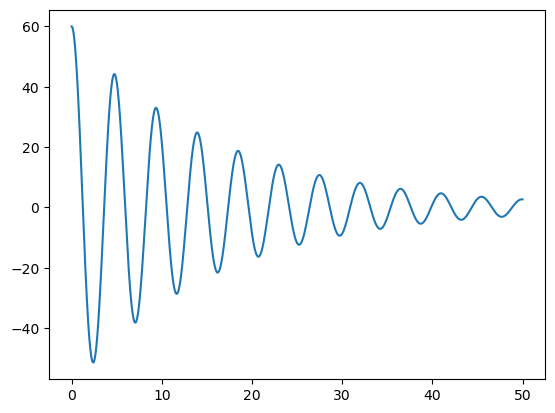

In [4]:
# Fazemos um teste
T = 50  # Instante final da integração
n = 50000  # Número de passos da integração
dt = T/n  # Calcula o passo da integração
t = np.arange(0, T, dt)

v0 = [60*np.pi/180, 0]  # theta0 e omega0
resultado = euler(pendulo, v0, dt, n)

theta = resultado[:,0]  # pega a primeira coluna da tabela
omega = resultado[:,1]  # pega a segunda coluna da tabela

plt.plot(t, theta*180/np.pi)

## Energia

O movimento do pêndulo ao se considerar a resistência do ar não possui mais a conservação da Energia Mecânica. Isso porque a resistência do ar causa uma força dissipativa. Isso pode ser visualizado ao se fazer o plot das energias cinética, potencial e mecânica.

In [5]:
K = (m*(L*omega)**2)/2
U = m*g*L*(1-np.cos(theta))
E = K + U

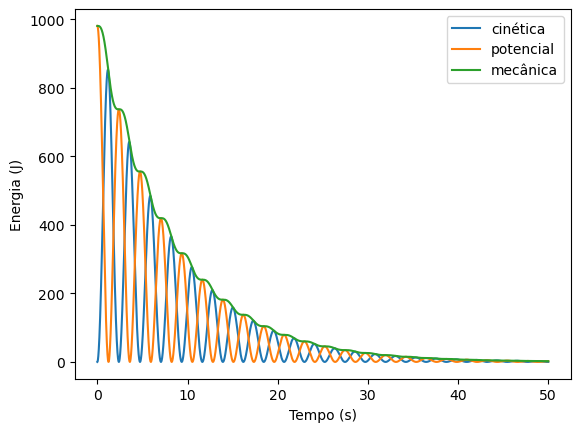

In [6]:
plt.plot(t, K, label='cinética')
plt.plot(t, U, label='potencial')
plt.plot(t, E, label='mecânica')
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend()

Porém, pra este tipo de problema a energia total do sistema deve ser conservado. Para obter a energia total, além da cinética e da potencial, precisamos calcular a energia dissipada. Como não existe uma equação padrão pra essa energia, utilizaremos a equação do trabalho para determinar qual a energia perdida pelo sistema causada pela força dissipativa:

\begin{equation}
d W = \vec{F} \cdot \vec{d r}
\tag{1}
\end{equation}

Como a força dissipativa está sempre na direção oposta ao movimento, podemos reescrever essa multiplicação escalar por uma multiplicação simples do módulo da força pelo módulo do deslocamento, lembrando que o sinal deverá ser negativo pois são vetores anti-paralelos.

\begin{equation}
dW = -bv dr
\tag{2}
\end{equation}

dr é o deslocamento, que pode ser colocado em função de uma variação de tempo utilizando a velocidade:

\begin{equation}
dW = -bv vdt \\
dW = -bv^2dt
\end{equation}

Por fim, substituímos a velocidade em função da velocidade angular e colocamos no formato diferencial:

\begin{equation}
\frac{dW}{dt} = -b(L \omega)^2
\tag{3}
\end{equation}

Com isso, possuímos 3 equações diferenciais que devem ser integradas ao mesmo tempo: do ângulo theta, da velocidade angular e do trabalho da força dissipativa:

\begin{equation}
\frac{d\theta}{dt} = \omega\\
\frac{d\omega}{dt} = -\frac{g}{L}\sin{\theta} -\frac{b}{m}\omega\\
\frac{dW}{dt} = -b(L \omega)^2
\end{equation}

In [7]:
# Definimos a função que calcula as derivadas do movimento do pêndulo
# Note que agora a função pêndulo recebe 3 valores e retorna 3 valores

def pendulo(theta, w, W):
    """ Calcula as derivadas do movimento do pêndulo com resistência do ar: Eq. 4 da Aula 12
    
    Parameters
    ----------
    theta : float
        O ângulo inicial, em radianos
    w : float
        A velocidade angular inicial, em radianos por segundo
    W : float
        O trabalho inicial, em Joules
    """
    dthetadt = w  # A derivada de theta em relação ao tempo
    dwdt = -(g/L)*np.sin(theta) - (b/m)*w  # A derivada de omega em relação ao tempo
    dWdt = -b*(L*w)**2 # A derivada do trabalho em relação ao tempo
    return dthetadt, dwdt, dWdt

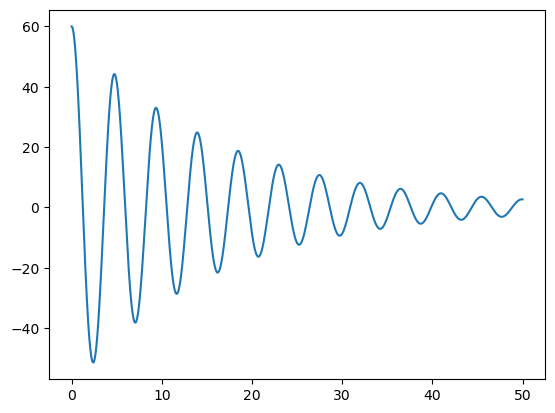

In [8]:
# Aplicamos a integração

T = 50  # Instante final da integração
n = 50000  # Número de passos da integração
dt = T/n  # Calcula o passo da integração
t = np.arange(0, T, dt)

v0 = [60*np.pi/180, 0, 0]  # theta0, omega0 e W0, note que agora são 3 valores iniciais
resultado = euler(pendulo, v0, dt, n) # Chamamos a função Euler sem precisar modificá-la

theta = resultado[:,0]  # pega a primeira coluna da tabela
omega = resultado[:,1]  # pega a segunda coluna da tabela
W = resultado[:, 2]  # pega a terceira coluna da tabela

plt.plot(t, theta*180/np.pi)

O trabalho resulta em um valor negativo porque é uma quantidade de energia que o sistema está perdendo, logo para obter a energia total, precisamos somar a energia mecânica com o negativo do trabalho.

In [9]:
K = (m*(L*omega)**2)/2
U = m*g*L*(1-np.cos(theta))
E = K + U - W

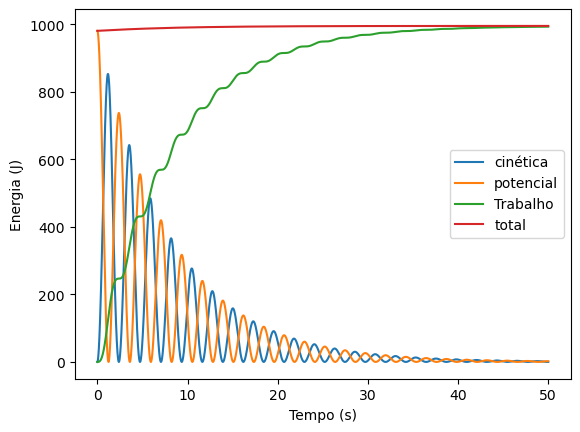

In [10]:
plt.plot(t, K, label='cinética')
plt.plot(t, U, label='potencial')
plt.plot(t, -W, label='Trabalho')
plt.plot(t, E, label='total')
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend()

Text(0, 0.5, 'Energia (J)')

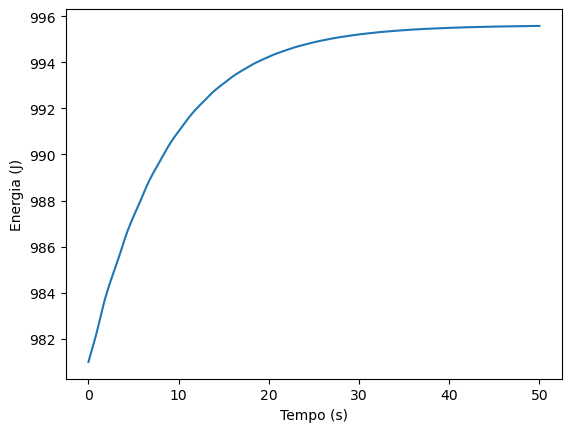

In [11]:
# Se olharmos apenas a energia total vemos que ela cresce um pouco ao longo do tempo invés de ser constante como deveria ser
plt.plot(t, E)
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')

In [12]:
# Podemos calcular o quanto a energia cresce
print((E[-1]-E[0])/E[0])

0.014857414961474065


## Back-foward method

As constantes oriundas de problemas que possuem Conservação da Energia Mecânica, Energia Total, Momento Linear ou Momento Angular são bastante úteis para identificar a propagação do erro numérico. Se não houvesse erro numérico, e o problema físico abordado está bem escrito, então as Leis de Conservações se aplicam de forma que seu valor permaneça constante. Porém, dependendo do problema, pode ser muito difícil, mas não impossível, escrever as equações de conservação, principalmente quando envolvem muitos objetos e forças diferentes.

Para resolver esse problema, existe um outro método numérico para averiguar se a integração está acontecendo de forma correta, propagando o menor erro possível. Este é chamado de Back-Foward Method. Neste caso, realizamos a integração do tempo inicial t0 até o tempo final tf, com um passo escolhido dt, como feito anteriormente. Ao se terminar a integração, utilizamos o último valor obtido para tf como condição inicial e realizamos uma nova integração numérica com passo de -dt, iniciando em tf e terminando em t0. Se a propagação do erro fosse zero, a nova integração retornaria ao valor inicial. Senão, as duas soluções divergirão. Uma nota importante aqui é que este método é ótimo para averiguar erro numérico. Se o sistema for caótico, esse retorno precisa ser analisado com mais cuidado.

In [13]:
# Note, não precisamos redefinir os parâmetros,
# basta chamar a função Euler, passando a última linha
# do resultado da primeira integração como condição inicial
# e inverter o sinal do passo.

resultado_back = euler(pendulo, resultado[-1], -dt, n)

theta_back = resultado_back[:,0]  # pega a primeira coluna da tabela
omega_back = resultado_back[:,1]  # pega a segunda coluna da tabela
W_back = resultado_back[:, 2]  # pega a terceira coluna da tabela

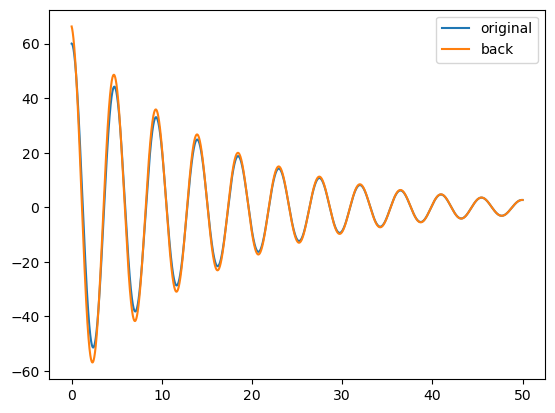

In [14]:
# Faremos o plot das duas integrações

plt.plot(t, theta*180/np.pi, label='original')
# Para a nova integração precisamos inverter a ordem da lista para corresponder ao tempo correto
plt.plot(t, theta_back[::-1]*180/np.pi, label='back')
plt.legend()

# Notem que há uma pequena diferença entre as duas integrações

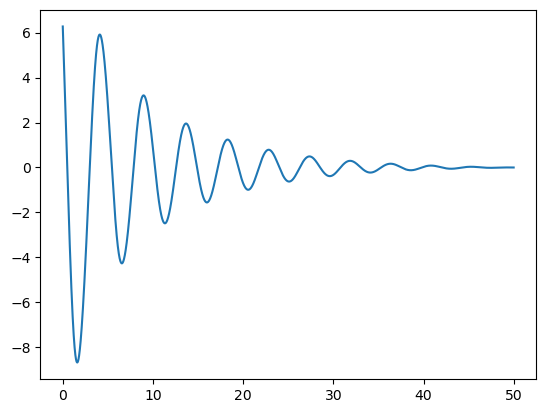

In [15]:
# Vamos fazer um plot da diferença entre os dois métodos

plt.plot(t, (theta_back[::-1] - theta)*180/np.pi)

Cabe àquele que está analisando o problema verificar se essa diferença entre as duas integrações é importante ou não. E aqui depende de qual nível de precisão se pretende obter.